<a href="https://colab.research.google.com/github/jhermosillo/DIPLOMADO_CDP/blob/main/Modulo%204%20-%20Machine%20Leaning/code/ML_11_Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Objetivo:
# Deben diseñar un producto de aprendizaje de máquina que reduzca la
# dimensionalidad de los datos proporcionados, y después los clasifique correctamente.
# -- Los datos proporcionados corresponden al análisis de características de
# equipos celulares. Inicialmente consta de 44 variables, incluyedo: battery_power,
#	bluetooth, clock_speed, dual_sim, fc, four_g, int_memory, m_dep, mobile_wt,
#	n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, three_g, touch_screen
#	wifi. Más otras 23 variables anónimas. Algunas variables pueden ser irrelevantes
# para la tarea de clasificación, o incluso pueden estar repetidas.
# -- Las etiquetas de salida corresponden a 4 posibles clases, asociadas al precio
# de los equipos, las cuales van de 0 para los más baratos, hasta 3 para los más caros.
# -- Deberan dividir el set de datos proporcionado entre entrenamiento y validación.
# -- El set de test no lo verán. Ese lo tengo yo para la evaluación final.
# -- Su tarea consiste en evaluar distintos modelos de reducción de dimensionalidad y
# de clasificación, y elegir la mejor combinación. Evalúen los vistos en clase, u
# otros existentes en sklearn.
# -- Traten de reducir el sobre ajuste tanto como sea posible, eso aumentará las
# probabilidades de que cuando yo aplique sus modelos al set de test, los resultados
# tengan desempeño comparable.
# -- La evaluación considerará el desempeño de sus modelos en el set de test, y la
# tasa de reducción en la dimensionalidad del vector: entre más corto mejor. Es decir,
# deben encontrar un compromiso entre tener un vector corto y uno que tenga el 
# mejor desempeño de clasificación.

In [ ]:
# Este notebook contiene un ejemplo con PCA y KNN, el cual obtiene desempeño muy
# limitado, pero sirve como punto de partida.

In [ ]:
# Entrega: será en dos partes.
# -- 1) Por equipo, hasta 5 personas, enviar su código y sus modelos pre-etrenados
# (yo cargaré los modelos y los correré sobre el set de test que tengo). Pueden
# formar los equipos libremente.
# -- 2) De manera individual, deberán enviar por correo, un PDF con las respuestas
#  a las preguntas que aparecen en este notebook.Las preguntas aparecen indicadas
# como "== QN ==", donde N es el número de la pregunta, ejemplo: == Q1 == para la
# pregunta 1.
# -- El plazo para la entrega será el sábado 29 de mayo.

In [ ]:
# Recuerden que la documentación de sklearn puede ser un gran recurso.

In [1]:
# Put here your imports
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from joblib import dump, load

# Part 0: Load data (provided)

In [2]:
# Load zipped data, and see names of variables
npz_loaded = np.load("train_data.npz")
print(sorted(npz_loaded.files))

['x', 'y']


In [3]:
# Extract data into individual variables
x_train = npz_loaded['x']
y_train = npz_loaded['y']

print(x_train.shape)
print(y_train.shape)

(1800, 44)
(1800,)


In [4]:
# Split data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(1440, 44)
(1440,)
(360, 44)
(360,)


In [ ]:
# == Q1 ==: En la celda anterior, elige y justifica el procentaje de datos utilizado
# para el set de validación.

# Part 1: Dimensionality reduction

In [5]:
# Identify the most relevant variables and perform dimensionality reduction
# Hint: you can try out methdos like PCA, t-SNE, etc.
reduce_model = PCA(n_components=2).fit(x_train)

x_train_R = reduce_model.transform(x_train)
x_val_R = reduce_model.transform(x_val)

print(x_train_R.shape)
print(x_val_R.shape)

(1440, 2)
(360, 2)


In [ ]:
# == Q2 ==: En la celda anterior, justifica el modelo seleccionado para reducir
# la dimensionalidad de los datos.

# Part 2: Classification

In [6]:
# Select a classification model, and use your compressed data to train it
# Hints: you might use grid search. You can try out models like, KNN, Naive Bayes,
# Perceptron, Logistic regression, SVM, Decision trees, Random forest, Bagging, etc.
class_model = KNeighborsClassifier().fit(x_train_R, y_train)

print(f"Training mean accuracy: {class_model.score(x_train_R, y_train):6.4f}")
print(f"Validation mean accuracy: {class_model.score(x_val_R, y_val):6.4f}")

Training mean accuracy: 0.8368
Validation mean accuracy: 0.7833


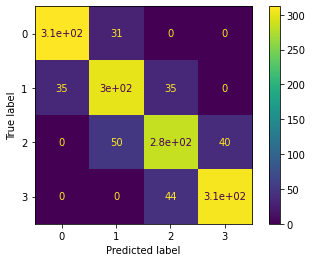

In [7]:
# Plot confusion matrix of best model on the training set
y_train_hat = class_model.predict(x_train_R)
CM = confusion_matrix(y_train, y_train_hat, labels=class_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=class_model.classes_)
disp.plot()

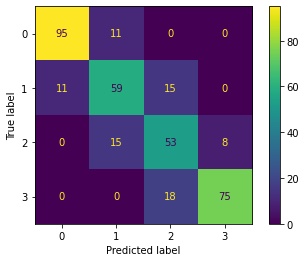

In [8]:
# Plot confusion matrix of best model on the validation set
y_val_hat = class_model.predict(x_val_R)
CM = confusion_matrix(y_val, y_val_hat, labels=class_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=class_model.classes_)
disp.plot()

In [ ]:
# == Q3 ==: De las celdas anteriores, justifica el modelo seleccionado para 
# clasificación.

# Part 3: save best models to disk

In [9]:
# Save reduction and classification models to disk
dump(reduce_model, 'reduction_model.joblib')
dump(class_model, 'classification_model.joblib')

['classification_model.joblib']

# Part 4: final evaluation on the test set

In [ ]:
# Esta será la parte de evaluación grupal que yo realizaré.

In [10]:
# Load models
reduce_model = load('reduction_model.joblib')
class_model = load('classification_model.joblib')

In [11]:
# Load test data
npz_loaded = np.load("test_data.npz")
print(sorted(npz_loaded.files))

x_test = npz_loaded['x']
y_test = npz_loaded['y']

print(x_test.shape)
print(y_test.shape)

['x', 'y']
(200, 44)
(200,)


In [12]:
# Apply reduction and classification
x_test_R = reduce_model.transform(x_test)
print(x_test_R.shape)

print(f"Training mean accuracy: {class_model.score(x_test_R, y_test):6.4f}")

(200, 2)
Training mean accuracy: 0.8200


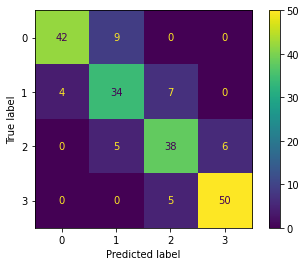

In [13]:
# Plot confusion matrix of best model on the validation set
y_test_hat = class_model.predict(x_test_R)
CM = confusion_matrix(y_test, y_test_hat, labels=class_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=class_model.classes_)
disp.plot()